# Topos assignment

Below in this notebooks gives the method used to scrap the data from the wikipedia website(link as given below) and to clean and store them. A geographical plot has been plotted based on the geo location (latitude and longitude) that was obtained in the data that was scrapped for better visualization. 

Link -https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

The methods used are basic, website scrapping, using BeautifulSoup library. By the end of this notebook being run, there will be a CSV file that will be generated with the data being scrapped and stored(ready to be uploaded to any Data base using the CSV)


To plot the geo map on USA, the library used is Basemap. This helps us use the data of latitude and longitude to be plotted on the map. While doing so, there can be issues due to a bug of the toolkit. TO ensure, a work around is as provided to locate the library on the local system. It is commented for initial use. In case, of error throws on PAKG, kindly uncomment it and change the location based on your system and run it. It should be good.

In [1]:
# Inluded librarires. Kindly make sure, these are installed if throws error
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
# The below line is to solve an error that arises due to importing Basemap. This can be ingored if the last plot is not needed or
# the library is installed properly. Uncomment and change the location according to your system locating the 
# "proj4-4.9.3-hcf24537_7" or similar. This is solely for my system.
os.environ['PROJ_LIB'] = r'C:\Users\prabh\Anaconda3\pkgs\proj4-4.9.3-hcf24537_7\Library\share'
from mpl_toolkits.basemap import Basemap

In [2]:
# Url of assignment
url = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"

In [3]:
# Checking if the Url gives response. Response <200> - means a success message
response = get(url)
print(response)
from bs4 import BeautifulSoup as bs ## importing Beautiful Soup
html_soup = bs(response.text,'html.parser')## python's in built library HTML parser
type(html_soup)

<Response [200]>


bs4.BeautifulSoup

In [4]:
id_check = html_soup.find("div", class_="mw-content-ltr")
id_check.prettify # uncomment if needed to see the HTML of the page

In [5]:
tables=id_check.find('table', class_="wikitable sortable")
tables.prettify # uncomment if needed to see the HTML of the page

In [6]:
rows=tables.find_all('tr')
rows # uncomment if needed to see the rows

In [7]:
len(rows) # verifying the number of rows as per the wikipedia page

315

Fr the ease of working, there are two functions that has been defined in this notebook as below

### Functions

* `arr_cleaner` - This function cleans any character that is passed as `char` to it from the array of data passed as `arr`                       and returns the array cleaned of the character
* `clean_html` - This cleans all the major HTML tags from the dataframe when passed as a `df`

In [8]:
# Function that cleans the character - char from the array that we pass as arr
def arr_cleaner(char, arr):
    i=0
    n=char
    length=len(arr)
    while(i<length):
        if(arr[i]==n):
            arr.remove(arr[i])
            length = length -1  
            continue
        i = i+1
    return arr

# Function to clean all the units and HTML tags that can cause our exporting using pandas.
# Removed units to make it consistanct and abide the SQL normalities
def clean_html(df):
        arr=df.columns
        for col in arr:
            try:
                df[col]=df[col].str.replace(",", '')
                df[col]=df[col].str.replace("%", '')
                df[col]=df[col].str.replace('\[.*?\]' , '')
                df[col]=df[col].str.replace(' sq mi' , '')
                df[col]=df[col].str.replace('km2' , '')
                df[col]=df[col].str.replace('/sq mi' , '')
                df[col]=df[col].str.replace('/km2' , '')
                df[col]=[s.strip('\xa0sq\xa0 sq mi') for s in df[col]]
                df[col]=[s.strip('\xa0sq\xa0 /sq mi') for s in df[col]]
            except:
                pass
        return df

In [9]:
csv_rows=[]
for values in rows:
    texts=list(values)
    try:
        arr_cleaner('\n', texts) # we use the func to clean the character
    except:
        pass
    second=[]
    for val in texts:
        txt=val.text
        txt=re.sub("\n", "", txt)
        txt=re.sub("[[]c]", "", txt)
        second.append(txt)
    csv_rows.append(second)
print(csv_rows)

### Cleaning

The major cleaning and adjustments starts from here - 

In [10]:
# We change the headers for making it easy during importing the csv to BigQuery path
csv_rows[0][6]='2016_land_area_1(sq mi)'
csv_rows[0][7]='2016_population_density_1(/sq mi)'
# insert 2 new columns as we have additional data in different units given
csv_rows[0].insert(7, '2016_land_area_2(km2)')
csv_rows[0].insert(9, '2016_population_density_2(/km2)')
csv_rows[0]

['2018rank',
 'City',
 'State',
 '2018estimate',
 '2010Census',
 'Change',
 '2016_land_area_1(sq mi)',
 '2016_land_area_2(km2)',
 '2016_population_density_1(/sq mi)',
 '2016_population_density_2(/km2)',
 'Location']

In [11]:
# Making some udjustments in the dataframe to make it perfect
df = pd.DataFrame(csv_rows, columns=csv_rows[0])
df=df.drop(0, axis=0)

In [12]:
df

In [13]:
# We clean the data frame by passing it to the clean function defined earlier
clean_html(df)

,2018rank,City,State,2018estimate,2010Census,Change,2016_land_area_1(sq mi),2016_land_area_2(km2),2016_population_density_1(/sq mi),2016_population_density_2(/km2),Location
1,1,New York City,New York,8398748,8175133,+2.74,301.5,780.9,28317,10933,40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...
2,2,Los Angele,California,3990456,3792621,+5.22,468.7,1213.9,8484,3276,34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
3,3,Chicago,Illino,2705994,2695598,+0.39,227.3,588.7,11900,4600,41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
4,4,Houston,Texa,2325502,2100263,+10.72,637.5,1651.1,3613,1395,29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...
5,5,Phoenix,Arizona,1660272,1445632,+14.85,517.6,1340.6,3120,1200,33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...
6,6,Philadelphia,Pennsylvania,1584138,1526006,+3.81,134.2,347.6,11683,4511,40°00′34″N 75°08′00″W﻿ / ﻿40.0094°N 75.1333°W﻿...
7,7,San Antonio,Texa,1532233,1327407,+15.43,461.0,1194.0,3238,1250,29°28′21″N 98°31′30″W﻿ / ﻿29.4724°N 98.5251°W﻿...
8,8,San Diego,California,1425976,1307402,+9.07,325.2,842.3,4325,1670,32°48′55″N 117°08′06″W﻿ / ﻿32.8153°N 117.1350°...
9,9,Dalla,Texa,1345047,1197816,+12.29,340.9,882.9,3866,1493,32°47′36″N 96°45′59″W﻿ / ﻿32.7933°N 96.7665°W﻿...
10,10,San Jose,California,1030119,945942,+8.90,177.5,459.7,5777,2231,37°17′48″N 121°49′08″W﻿ / ﻿37.2967°N 121.8189°...


In [14]:
# Checking if we have null values in the dataframe
df.isna().sum()

2018rank                             0
City                                 0
State                                0
2018estimate                         0
2010Census                           0
Change                               0
2016_land_area_1(sq mi)              0
2016_land_area_2(km2)                0
2016_population_density_1(/sq mi)    0
2016_population_density_2(/km2)      0
Location                             0
dtype: int64

In [15]:
# Checking the presence of unwanted characters
df["Location"][1]

'40°39′49″N 73°56′19″W\ufeff / \ufeff40.6635°N 73.9387°W\ufeff / 40.6635; -73.9387\ufeff (1 New York City)'

In [16]:
# The last column "Location" has 3 different folrm s of location
# Segrigating them into seperate columns
# Location - has location latitude and longitude in one form
# Location II - has location latitude and longitude in second form
# Location III - has location latitude and longitude in third form
df[['Location', 'Location_II']] = df['Location'].str.split('\ufeff / \ufeff', expand=True)
df[['Location_II', 'Location_III']] = df['Location_II'].str.split('\ufeff / ', expand=True)
df

In [17]:
# We clean the Location III and split it further into two seperate column, this is solely for the purpose of plotting 
# the location on the graph for better visualization
df["Location_III"]=df["Location_III"].str.replace(';' , ' ')
df["Location_III"]=df["Location_III"].str.replace('\(.*?\)' , '')
df[['Location_lat', 'Location_log']] = df['Location_III'].str.split('  ', expand=True)
df

In [18]:
# Further cleaning and converting the str type of field to float as the Location column has float type of data
# This will help us plot them on map
df['Location_lat'] = df.Location_lat.astype(float)
df['Location_log'] = df['Location_log'].str.replace('\ufeff' , '')
df['Location_log'] = df.Location_log.astype(float)
df.dtypes

2018rank                              object
City                                  object
State                                 object
2018estimate                          object
2010Census                            object
Change                                object
2016_land_area_1(sq mi)               object
2016_land_area_2(km2)                 object
2016_population_density_1(/sq mi)     object
2016_population_density_2(/km2)       object
Location                              object
Location_II                           object
Location_III                          object
Location_lat                         float64
Location_log                         float64
dtype: object

In [19]:
df

,2018rank,City,State,2018estimate,2010Census,Change,2016_land_area_1(sq mi),2016_land_area_2(km2),2016_population_density_1(/sq mi),2016_population_density_2(/km2),Location,Location_II,Location_III,Location_lat,Location_log
1,1,New York City,New York,8398748,8175133,+2.74,301.5,780.9,28317,10933,40°39′49″N 73°56′19″W,40.6635°N 73.9387°W,40.6635 -73.9387﻿,40.6635,-73.9387
2,2,Los Angele,California,3990456,3792621,+5.22,468.7,1213.9,8484,3276,34°01′10″N 118°24′39″W,34.0194°N 118.4108°W,34.0194 -118.4108﻿,34.0194,-118.4108
3,3,Chicago,Illino,2705994,2695598,+0.39,227.3,588.7,11900,4600,41°50′15″N 87°40′54″W,41.8376°N 87.6818°W,41.8376 -87.6818﻿,41.8376,-87.6818
4,4,Houston,Texa,2325502,2100263,+10.72,637.5,1651.1,3613,1395,29°47′12″N 95°23′27″W,29.7866°N 95.3909°W,29.7866 -95.3909﻿,29.7866,-95.3909
5,5,Phoenix,Arizona,1660272,1445632,+14.85,517.6,1340.6,3120,1200,33°34′20″N 112°05′24″W,33.5722°N 112.0901°W,33.5722 -112.0901﻿,33.5722,-112.0901
6,6,Philadelphia,Pennsylvania,1584138,1526006,+3.81,134.2,347.6,11683,4511,40°00′34″N 75°08′00″W,40.0094°N 75.1333°W,40.0094 -75.1333﻿,40.0094,-75.1333
7,7,San Antonio,Texa,1532233,1327407,+15.43,461.0,1194.0,3238,1250,29°28′21″N 98°31′30″W,29.4724°N 98.5251°W,29.4724 -98.5251﻿,29.4724,-98.5251
8,8,San Diego,California,1425976,1307402,+9.07,325.2,842.3,4325,1670,32°48′55″N 117°08′06″W,32.8153°N 117.1350°W,32.8153 -117.1350﻿,32.8153,-117.1350
9,9,Dalla,Texa,1345047,1197816,+12.29,340.9,882.9,3866,1493,32°47′36″N 96°45′59″W,32.7933°N 96.7665°W,32.7933 -96.7665﻿,32.7933,-96.7665
10,10,San Jose,California,1030119,945942,+8.90,177.5,459.7,5777,2231,37°17′48″N 121°49′08″W,37.2967°N 121.8189°W,37.2967 -121.8189﻿,37.2967,-121.8189


In [20]:
df.to_csv('us_cities_by_population.csv')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


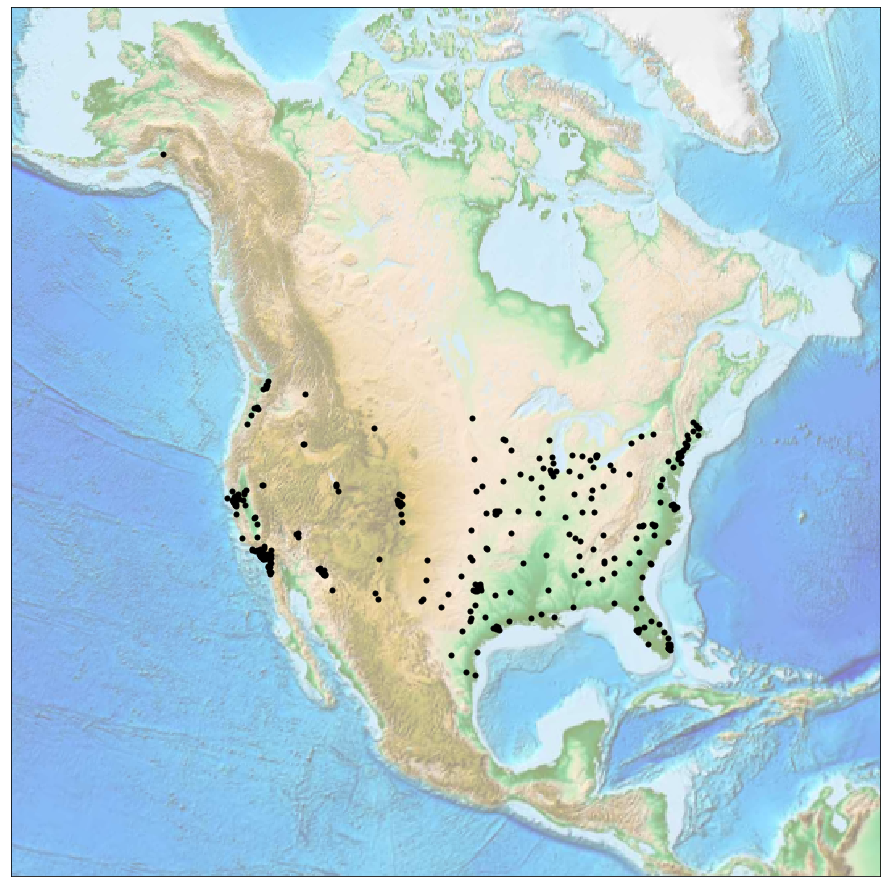

In [21]:
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

for i in range(len(df['2018rank'])):
    label=df.iloc[i][1]
    lat=df.iloc[i][13]
    log=df.iloc[i][14]
    # Map (long, lat) to (x, y) for plotting
    x, y = m(log, lat)
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, '',fontsize=5);

### Conclusion

Thus, at the end we have data scrapped and cleaned from all the HTML tags that are unnecessary and stored into a data frame that is later exported into a CSV for storing it into a physical database. The CSV file is at the location of the notebook for reference.

### License

MIT License
    
<img src="Images/OSI_Approved_License.png" width="100" align="right"/>

    
Copyright (c) 2019 Prabhu Subramanian

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
